---

# Linear Regression  
> **Moussa JAMOR**
> 
> jan 7 2024
> 
> [https://github.com/JamorMoussa](https://github.com/JamorMoussa)

---

## Contents:

<span style="color:blue;">

* ### Theory : Simple Linear Regression
    * #### Linear regression formula
    * #### Least Mean Squares
    * #### Gradient Descent MSE
    * #### Matrix notation 
</span>

## Simple Linear Regression :

**Linear Regression** is a classic machine learning algorithm, that predict the linear relationship between an independent variable $x$ and a dependent variable $y$. 

Let the training data $S = \left \{(x_i, y_i) \right \}_{i = 0}^{m}$, where $x_i \in \mathbb{R}^d$ and $y \in \mathbb{R}$.

### Linear regression formula : 

The purpose is find a regressor $h_s$ such as : 

$$ h_s(x) = w^T.x + w_0 \Longleftrightarrow  h_s(x) = w^T.x $$

where $w \in \mathbb{R}^{d+1} $ by including the bias $w_0$, and x = $\begin{bmatrix}
                                                                            1 \\
                                                                           x_1 \\
                                                                           \vdots \\
                                                                           x_d \\
                                                                          \end{bmatrix}$

The vector $w$ is inistized randomly, the purpose is make $h_s$ close to $y$ as much as possible, at least for the training examples $S$ we have. To formalize this, we define a function that measure how close $h_s(x_i)$ to label $y_i$.

### Mean squared error: <a id = "mse">

We define the **Mean squared error** as our **Cost function :** 

$$ J(w) = \frac{1}{2m} \sum_{i=1}^{m} (h_s(x_i) - y_i)^2 $$

We aim to select the parameter vector $w$ to minimize the cost function $J(w)$. To achieve this, we employ a search algorithm that commences with an initial guess $w_0$ and iteratively updates the model parameters $w$ until the cost function $J(w)$ is minimized.

### Gradient Descent MSE  : <a id="lms">

Specialy, let consider a [Gradient descent algorithm](https://en.wikipedia.org/wiki/Gradient_descent), which start with $w_0$ and peatedly performs the update : 

$$ w_{j+1} = w_{j} - \alpha . \frac{\partial J(w_j)}{\partial w_j}$$

where $\alpha \in \mathbb{R}^+$ is an hyperparamters for the model, called **learning rate**. In order to impliment this algorithm let find the partial derivative of $J(w_i)$ repect to $w_i$ :

 $ \hspace{3cm} \text{ for } j \in \{0, ..., d+1\}$ : 

$$ \frac{\partial J(w_j)}{\partial w_j} = \frac{\partial}{\partial w_j} \left( \frac{1}{2m} \sum_{i=1}^{m} (h_s(x_i) - y_i)^2  \right) $$

$$= \frac{1}{2m} \sum_{i=1}^{m} \frac{\partial}{\partial w_j} \left(h_s(x_i) - y_i\right)^2 $$

$$= \frac{1}{m} \sum_{i=1}^{m} \left(w_j^T.x_i - y_i\right).x_j $$

finally, 

$$ w_{j+1} = w_{j} - \alpha. \frac{1}{m} \sum_{i=1}^{m} \left(w_j^T.x_i - y_i\right).x_j \mid  \text{ for } j \in \{0, ..., d+1\}$$

By grouping the updates of the coordinates into an update of the vector $w$ : 

$$ w = w - \alpha. \frac{1}{m} \sum_{i=1}^{m} \left(h_s(x_i) - y_i\right).x_i $$

### Matrix notation : 

Let's discuss an other way to solve the same problem without using the gradient descent. In this time we will use the matrix notation.  

Let's consider that : 

$$X = \begin{bmatrix}
 \textemdash & x_0^T & \textemdash \\
 &  \vdots  & \\
 \textemdash & x_i^T & \textemdash \\
 &  \vdots  & \\
 \textemdash & x_m^T & \textemdash \\
\end{bmatrix} \in \mathbb{R}^{m\times d} \hspace{0.5cm} \text{ and } \hspace{0.5cm} y = \begin{bmatrix}
 & y_0 &  \\
 &  \vdots  & \\
 & y_i &  \\
 &  \vdots  & \\
 & y_m &  \\
\end{bmatrix} \in \mathbb{R}^m $$ 


It's very simple to prove that : 

$$ J(w) = \frac{1}{2} \left \lVert Xw - y \right \rVert_{2}^{2} = \frac{1}{2m} \left( Xw - y\right)^T\left( Xw - y\right)$$

so, 

$$ \frac{\partial J(w)}{\partial w} =  \frac{\partial}{\partial w}  \frac{1}{2m} \left( Xw - y\right)^T.\left( Xw - y\right) $$

$$ =  \frac{1}{2m} \frac{\partial}{\partial w} \left( Xw - y\right)^T.\left( Xw - y\right) $$

$$  =  \frac{1}{2m} \frac{\partial}{\partial w} \left( (Xw)^T - y^T \right).\left( Xw - y\right) $$

$$  =  \frac{1}{2m} \frac{\partial}{\partial w} \left( (Xw)^TXw - (Xw)^Ty - y^T(Xw) + y^Ty \right) \mid \text{ where } y^Ty = cst$$

$$  =  \frac{1}{2m} \frac{\partial}{\partial w} \left( w^T(X^TX)w - (Xw)^Ty - y^T(Xw) \right) \mid  \text{ where } (Xw)^Ty =  y^T(Xw) $$

$$  =  \frac{1}{2m} \frac{\partial}{\partial w} \left( w^T(X^TX)w - 2(X^Ty)w \right) \hspace {1cm} (*) $$ 

$$  =  \frac{1}{2m} \left( 2X^TXw - 2X^Ty \right) $$ 

$$  =  \frac{1}{m} \left( X^TXw - X^Ty \right) $$ 


finally, 
$$ \frac{\partial J(w)}{\partial w} = \frac{1}{m} \left( X^TXw - X^Ty \right) $$

so, 

$$ \frac{\partial J(w)}{\partial w} = 0 \Longleftrightarrow X^TXw^* - X^Ty = 0 $$

$$ \Longleftrightarrow X^TXw^* = X^Ty $$

Thus the value of $w^*$ that minimize $J(w)$ is given in closed form by the equation : 

$$ w^* = (X^TX)^{-1}X^Ty $$

## Build Linear Regression : 

In [360]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [314]:
class Linear(np.ndarray):

    def __new__(cls, *shape):
        param = np.random.rand(*shape)        
        obj = np.asanyarray(param).view(cls)
        obj.parameters = param
        obj.p_shape = shape
        obj.x = np.zeros(shape[0])
        obj.grad = np.zeros_like(obj.parameters)

        if len(shape) == 1:
            obj.parameters = obj.parameters.reshape(1, -1)

        return obj

    def __array_finalize__(self, obj):
        if obj is None:
            return
        self.parameters = getattr(obj, 'parameters', None)
        self.p_shape = getattr(obj, 'p_shape', None)
        self.grad = getattr(obj, 'gard', None)

    def __call__(self, x: np.ndarray):
        if x.ndim ==1: x = x.reshape(1, -1) #raise ValueError(f"x is expect dim as 2, but {x.ndim} is given")
        self.x = x
        return np.dot(x, self.parameters.T)

In [315]:
class Optimizer:

    def __init__(self, model: Linear , lr=0.01):
        self.model = model
        self.lr = lr 

    def zero_grad(self):
        self.model.grad = np.zeros_like(self.model.parameters)

    def step(self):
        self.model.parameters -= self.lr * self.model.grad

In [316]:
class MSELoss:

    def __new__(cls, model: Linear):
        cls.model = model
        return cls

    @classmethod
    def backward(cls, y_pred , y):
        cls.model.grad = (y_pred - y)* cls.model.x 

In [363]:
class Module:

    def __call__(self, x: np.ndarray):
        return self.forward(x)

    @abstractmethod
    def forward(self, x: np.ndarray):
        ...

In [493]:
lg = Linear(2)

In [494]:
opt = Optimizer(lg, lr=0.01)

In [495]:
mseLoss = MSELoss(lg)

In [496]:
for i in range(100):
    for xi, yi in zip(X, y):
        opt.zero_grad()
        
        y_pred = lg(xi)
        
        mseLoss.backward(y_pred, yi)
        
        opt.step()

In [497]:
lg.parameters

array([[-10.,   2.]])

In [422]:
lg(np.array([[1, 1, 2]]))

array([[8.]])

In [485]:
X1 = np.random.rand(1000, 1)

In [486]:
y = np.dot(X1, np.array([[2]]).T) -10

In [487]:
X = np.block([np.ones((X1.shape[0], 1)), X1])

In [488]:
X

array([[1.        , 0.15884063],
       [1.        , 0.41366646],
       [1.        , 0.44658479],
       ...,
       [1.        , 0.05190607],
       [1.        , 0.06084256],
       [1.        , 0.81984547]])

In [489]:
t = np.linspace(0, 1, 100).reshape(-1, 1)

In [490]:
t1 = np.block([np.ones((100, 1)), t]) 

In [499]:
yp = lg(t1)

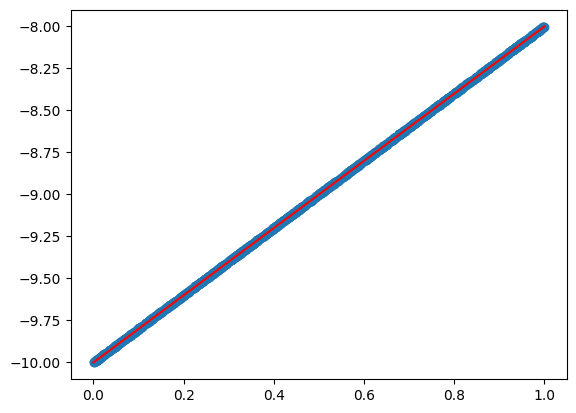

In [500]:
plt.scatter(X[:, 1], y)
plt.plot(t, yp, c="red")